## Facial Keypoints Detector

First and foremost step in Facial Keypoints Detector is detecting the face. There are many ML algorithm which detects faces. We'll use Haarcascade Classifier to detect the faces from an image.

In [31]:
import cv2
import numpy as np
import math
from PIL import Image
import time
import matplotlib.pyplot as plt

%matplotlib inline

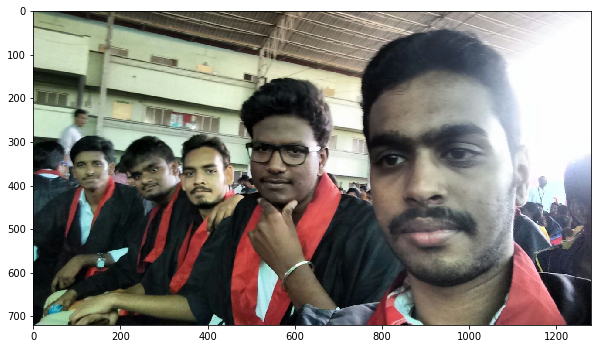

In [32]:
#img_faces = cv2.imread("/Users/mayurjain/Desktop/cv_images/face.jpg")
img_faces = cv2.imread("/Users/mayurjain/Desktop/cv_images/team.jpg")
img_rgb = cv2.cvtColor(img_faces,cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10,12))
plt.imshow(img_rgb)

This face detector uses information about patterns of intensity in an image to reliably detect faces under varying light conditions. So, to use this face detector, we'll first convert the image from color to grayscale.

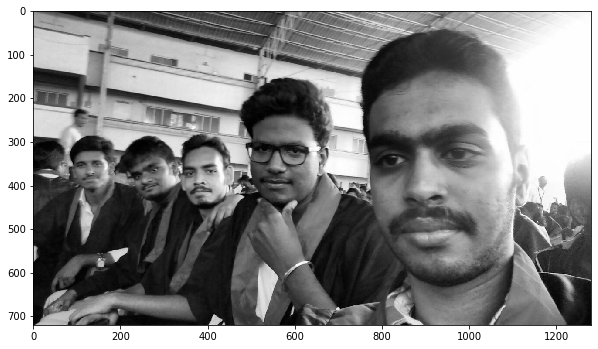

In [33]:
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
fig = plt.figure(figsize=(10,12))
plt.imshow(img_gray,cmap='gray')

Number of faces detected: 4


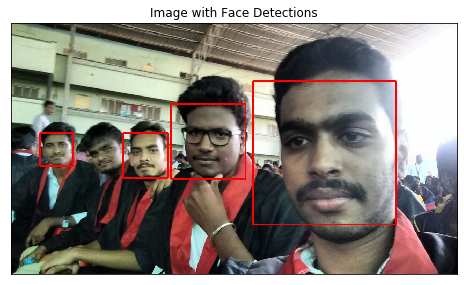

In [34]:
# Haarcascade Classifier to detect faces

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('Facial Keypoint Detection/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(img_gray, 1.25, 7)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(img_rgb)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detections')
ax1.imshow(image_with_detections)

Along with Face detection, there are many other algorithm for detecting body, eyes, smile etc in OpenCV.

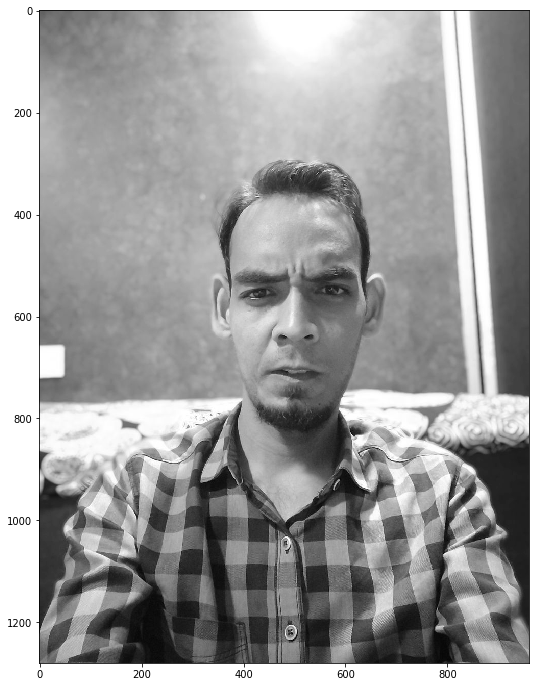

In [61]:
img_face = cv2.imread("/Users/mayurjain/Desktop/cv_images/face_eyes.jpg")
img_rgb = cv2.cvtColor(img_face,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
fig = plt.figure(figsize=(10,12))
plt.imshow(img_gray,cmap='gray')

Number of faces detected: 1


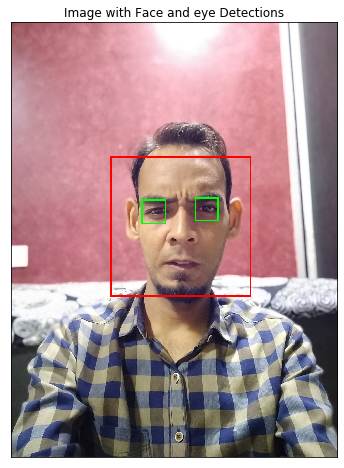

In [63]:
# First we'll perform face detection as done earlier then go ahead with eye detection using other haarcascade classifiers

face_cascade = cv2.CascadeClassifier("/Users/mayurjain/Facial Keypoint Detection/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("/Users/mayurjain/Facial Keypoint Detection/haarcascade_eye.xml")

# Detect the faces in image
faces = face_cascade.detectMultiScale(img_gray, 1.5, 4)


# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(img_rgb)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    r = max(w, h) / 2
    centerx = x + w / 2
    centery = y + h / 2
    nx = int(centerx - r)
    ny = int(centery - r)
    nr = int(r * 2)
    eyes = eye_cascade.detectMultiScale(image_with_detections[ny:ny+nr, nx:nx+nr],1.25,5)
    for (x,y,w,h) in eyes:
        cv2.rectangle(image_with_detections[ny:ny+nr, nx:nx+nr], (x,y), (x+w,y+h), (0,255,0), 3)
    
# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face and eye Detections')
ax1.imshow(image_with_detections)

In [64]:
### Add face and eye detection to this laptop camera function 
# Make sure to draw out all faces/eyes found in each frame on the shown video feed

# wrapper function for face/eye detection with your laptop camera
def laptop_camera_go():
    # Create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # Keep the video stream open
    while rval:
        
        # Plot the image from camera with all the face and eye detections marked
        cv2.imshow("face detection activated", frame)
        img_rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
        # Detect the faces in image
        faces = face_cascade.detectMultiScale(img_gray, 1.5, 4)


        # Print the number of faces detected in the image
        print('Number of faces detected:', len(faces))

        # Make a copy of the orginal image to draw face detections on
        image_with_detections = np.copy(frame)

        # Get the bounding box for each detected face
        for (x,y,w,h) in faces:
            # Add a red bounding box to the detections image
            cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
            eyes = eye_cascade.detectMultiScale(img_gray,1.1,5)
            for (x,y,w,h) in eyes:
                cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (0,255,0), 3)
        
        cv2.imshow("face detection activated", image_with_detections)
        
        # Exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # Exit by pressing any key
            # Destroy windows 
            cv2.destroyAllWindows()
            
            # Make sure window closes on OSx
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()

In [23]:
# Call the laptop camera face/eye detector function above
laptop_camera_go()

Number of faces detected: 0
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 2
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 1
Number of faces detected: 2
Number of faces detected: 1
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 0
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces dete

Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 1
Number of faces detected: 0
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0


## De-noise the image for better face detection

Image quality is an important aspect of any computer vision task. Typically, when creating a set of images to train a deep learning network, significant care is taken to ensure that training images are free of visual noise or artifacts that hinder object detection. While computer vision algorithms - like a face detector - are typically trained on 'nice' data, new test data doesn't always look so nice!

When applying a trained computer vision algorithm to a new piece of test data one often cleans it up first before feeding it in. This sort of cleaning - referred to as pre-processing - can include a number of cleaning phases like blurring, de-noising, color transformations, etc., and many of these tasks can be accomplished using OpenCV.
In this short subsection we explore OpenCV's noise-removal functionality to see how we can clean up a noisy image, which we then feed into our trained face detector.

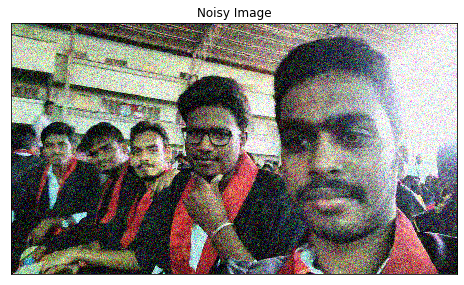

In [65]:
#Adding noise to the team image.

# Load in the multi-face test image again
image = cv2.imread('/Users/mayurjain/Desktop/cv_images/team.jpg')

# Convert the image copy to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Make an array copy of this image
image_with_noise = np.asarray(image)

# Create noise - here we add noise sampled randomly from a Gaussian distribution: a common model for noise
noise_level = 40
noise = np.random.randn(image.shape[0],image.shape[1],image.shape[2])*noise_level

# Add this noise to the array image copy
image_with_noise = image_with_noise + noise

# Convert back to uint8 format
image_with_noise = np.asarray([np.uint8(np.clip(i,0,255)) for i in image_with_noise])

# Plot our noisy image!
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image')
ax1.imshow(image_with_noise)

Number of faces detected: 4


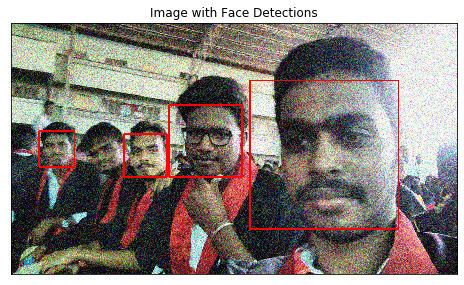

In [66]:
# Haarcascade Classifier to detect faces
img_gray = cv2.cvtColor(image_with_noise,cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('Facial Keypoint Detection/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(img_gray, 1.25, 7)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image_with_noise)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detections')
ax1.imshow(image_with_detections)

Even after adding noise to image, our Face detector has managed to detect 3 faces out of 5, while 4 were detect when there was no noise. Now to make the face detection better we can de-noise the image.

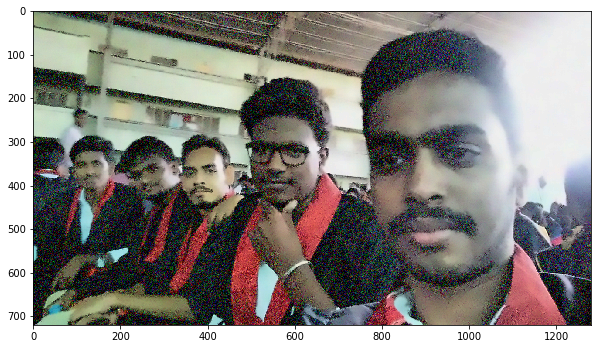

In [67]:
dst = cv2.fastNlMeansDenoisingColored(image_with_noise,None,15,15,7,21)

fig = plt.figure(figsize = (10,12))
plt.imshow(dst)

Number of faces detected: 4


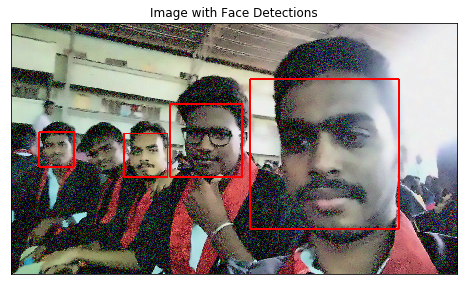

In [68]:
# Haarcascade Classifier to detect faces
img_gray = cv2.cvtColor(dst,cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('Facial Keypoint Detection/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(img_gray, 1.25, 7)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(dst)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detections')
ax1.imshow(image_with_detections)

From the above result, we can say that we can perform denoising to reduce the noise and then detect the faces to get better result.

## Importance of Blur in Edge Detection
Edge detection is a concept that pops up almost everywhere in computer vision applications, as edge-based features (as well as features built on top of edges) are often some of the best features for e.g., object detection and recognition problems.
Edge detection is a dimension reduction technique - by keeping only the edges of an image we get to throw away a lot of non-discriminating information. And typically the most useful kind of edge-detection is one that preserves only the important, global structures (ignoring local structures that aren't very discriminative). So removing local structures / retaining global structures is a crucial pre-processing step to performing edge detection in an image, and blurring can do just that.

https://en.wikipedia.org/wiki/Gaussian_blur#Common_uses

Edge detection is a convolution performed on the image itself, and you can read about Canny edge detection on this OpenCV documentation page.

### Canny edge detection

In the cell below we load in a test image, then apply Canny edge detection on it. The original image is shown on the left panel of the figure, while the edge-detected version of the image is shown on the right. Notice how the result looks very busy - there are too many little details preserved in the image before it is sent to the edge detector. When applied in computer vision applications, edge detection should preserve global structure; doing away with local structures that don't help describe what objects are in the image.

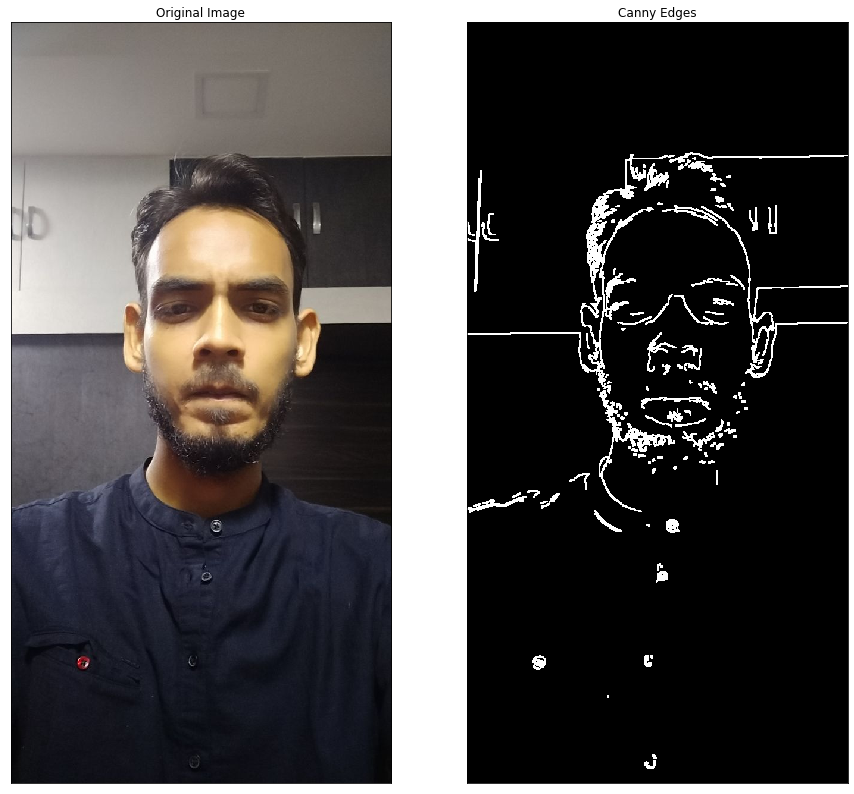

In [69]:
# Load in the image
image = cv2.imread('/Users/mayurjain/Desktop/cv_images/face.jpg')

# Convert to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  

# Perform Canny edge detection
edges = cv2.Canny(gray,100,200)

# Dilate the image to amplify edges
edges = cv2.dilate(edges, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')

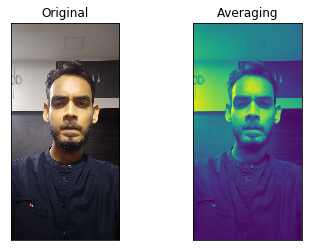

In [70]:
kernel = np.ones((4,4),np.float32)/16
dst = cv2.filter2D(gray,-1,kernel)

plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

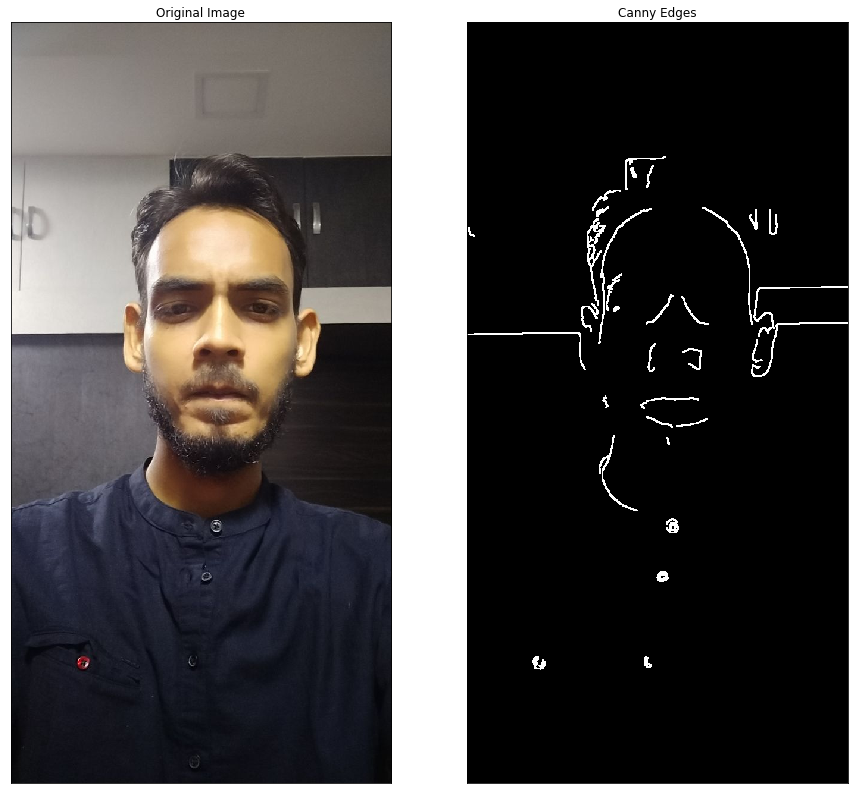

In [71]:
# Perform Canny edge detection
edges = cv2.Canny(dst,90,200)

# Dilate the image to amplify edges
edges = cv2.dilate(edges, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')

## Automatically Hide the Identity of an Individual¶

If you film something like a documentary or reality TV, you must get permission from every individual shown on film before you can show their face, otherwise you need to blur it out - by blurring the face a lot (so much so that even the global structures are obscured)! This is also true for projects like Google's StreetView maps - an enormous collection of mapping images taken from a fleet of Google vehicles. Because it would be impossible for Google to get the permission of every single person accidentally captured in one of these images they blur out everyone's faces, the detected images must automatically blur the identity of detected people.

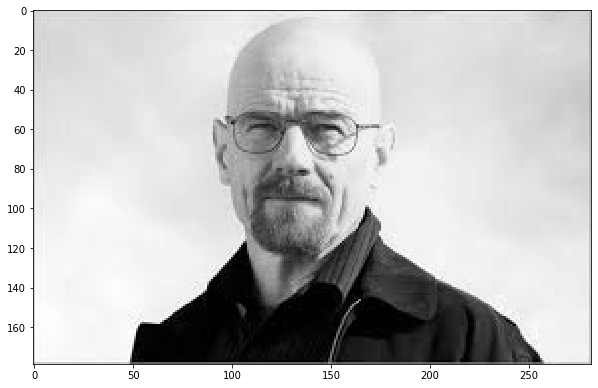

In [72]:
bb = cv2.imread("/Users/mayurjain/Desktop/cv_images/walterWhite.jpg")
bb_rgb = cv2.cvtColor(bb,cv2.COLOR_BGR2RGB)
bb_gray = cv2.cvtColor(bb_rgb,cv2.COLOR_RGB2GRAY)
fig = plt.figure(figsize=(10,12))
plt.imshow(bb_gray,cmap='gray')

Number of faces detected: 1


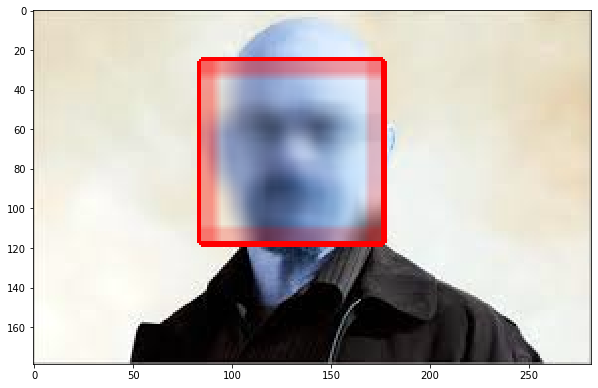

In [73]:
# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('Facial Keypoint Detection/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(bb_gray, 1.25, 7)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(bb)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    r = max(w, h) / 2
    centerx = x + w / 2
    centery = y + h / 2
    nx = int(centerx - r)
    ny = int(centery - r)
    nr = int(r * 2)

    #faceimg = img[ny:ny+nr, nx:nx+nr]
    kernel = np.ones((14, 14),np.float32)/196
    blur_face = cv2.filter2D(image_with_detections[ny:ny+nr, nx:nx+nr],-1,kernel)
    image_with_detections[ny:ny+nr, nx:nx+nr] = blur_face

plt.figure(figsize=(10,12))    
plt.imshow(image_with_detections)